In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = 0.5 * np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [4]:
import pickle

In [ ]:
ca_list = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 83, 89, 95, 101, 107, 113, 119, 125, 131, 137, 143, 148, 154, 160, 166, 172, 178, 184, 190, 196, 202, 208, 214, 219, 225, 231, 237, 242, 248, 254, 260, 265, 271, 277, 283, 289, 295, 301, 307, 312, 318, 324, 330, 336, 342, 348, 354, 360, 365]

In [106]:
aa = np.load(pre + f"velocity")
aa = [np.array(aa[i]) for i in range(len(aa))]

In [107]:
len(aa)

2000

In [179]:
aa[0].shape

(368, 3)

In [103]:
back_info = info

In [112]:
info = []

In [116]:
data = pd.DataFrame(info, columns=["Step", "Run", "D"])

In [117]:
data.to_csv("/Users/weilu/Research/data/openMM/diffusion.csv")

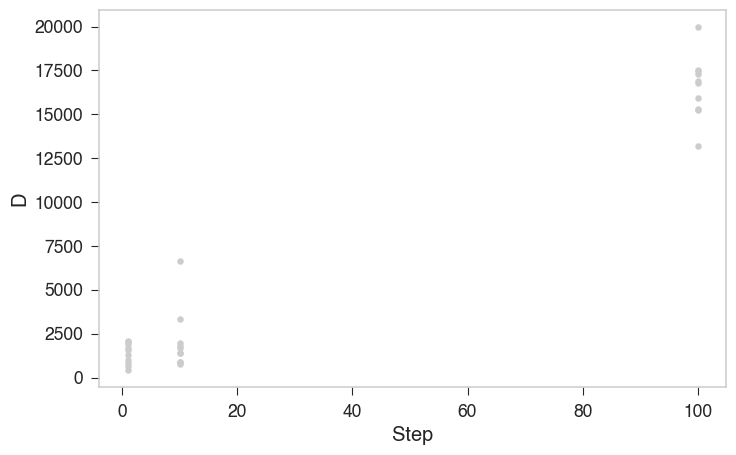

In [120]:
data.plot.scatter("Step", "D")

1 0
D:  421.3953351219964
1 1
D:  1698.0336883356424
1 2
D:  852.0455636056947
1 3
D:  649.8119449588723
1 4
D:  1941.051234376158
1 5
D:  1028.21561645918
1 6
D:  1273.8912874206378
1 7
D:  1557.46159616753
1 8
D:  2079.095532428978
1 9
D:  2028.3878812279168
10 0
D:  86.31165088975759
10 1
D:  181.745332962854
10 2
D:  140.3322901498942
10 3
D:  331.07107449282273
10 4
D:  139.9730972344313
10 5
D:  195.99438926565654
10 6
D:  167.0721286699596
10 7
D:  666.7276010556296
10 8
D:  76.07226066207525
10 9
D:  86.08355464366021
100 0
D:  172.75513066271145
100 1
D:  169.21334527860327
100 2
D:  199.74581322407914
100 3
D:  174.9029354498574
100 4
D:  152.50168170129996
100 5
D:  175.06469916478008
100 6
D:  131.89935663820418
100 7
D:  153.24031026288216
100 8
D:  159.1928716261427
100 9
D:  168.06593288791365


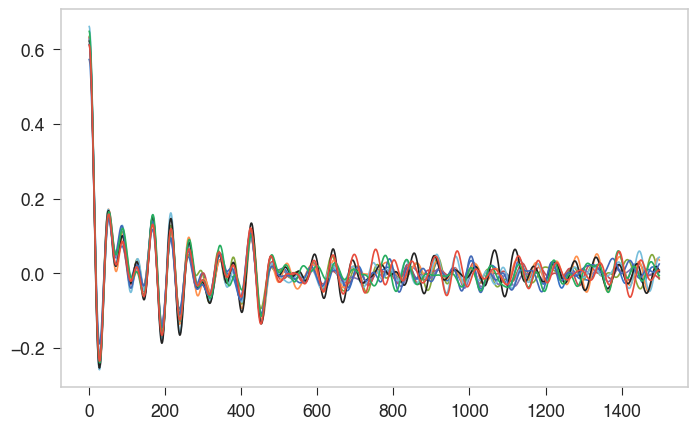

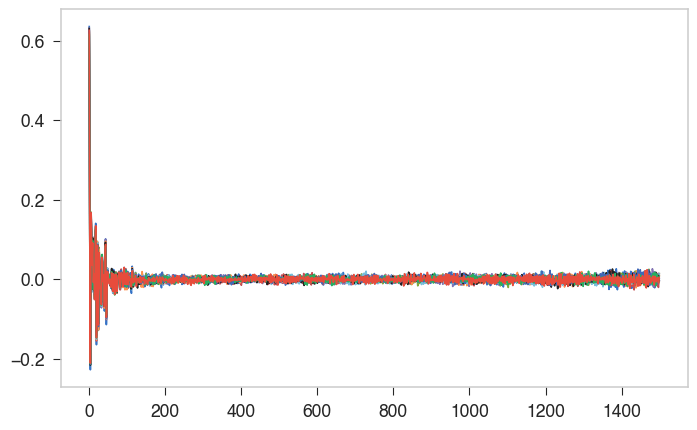

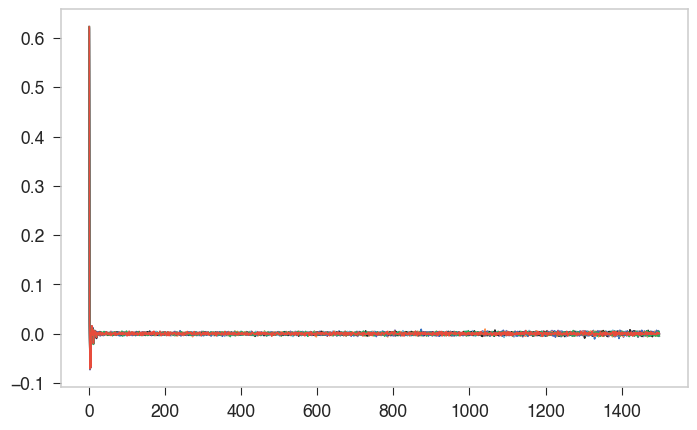

<Figure size 809.017x500 with 0 Axes>

In [113]:
for step in [1, 10, 100]:
    for i in range(10):
        print(step, i)
        pre = f"/Users/weilu/Research/server/dec_2019/diffusion_timescale/run1/step{step}/{i}/"
        ss = compute_and_plot_ca(pre, d_length=1500)
        D = (1/3)*np.sum(ss)*(1e3)*step
        info.append([step, i, D])
    plt.figure()

D:  2348.375409947705
D:  2736.6429666755894
D:  2507.2547549845453
D:  2937.27036965532
D:  2527.3304334868235
D:  2707.6306187349714
D:  2213.4258430077452
D:  3216.7432948519686
D:  3082.6199096507953
D:  2186.5271575617335


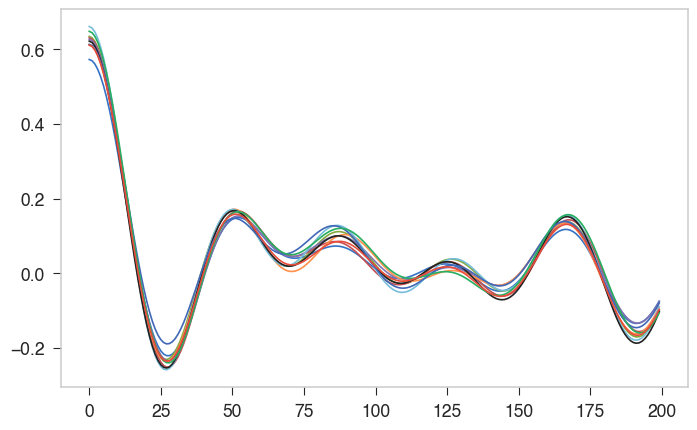

In [102]:
step = 1
for i in range(10):
    pre = f"/Users/weilu/Research/server/dec_2019/diffusion_timescale/run1/step{step}/{i}/"
    ss = compute_and_plot_ca(pre, d_length=1000)
    D = (1/3)*np.sum(ss)*(1e3)
    info.append([step, i, D])

In [ ]:
step = 10
for i in range(10):
    pre = f"/Users/weilu/Research/server/dec_2019/diffusion_timescale/run1/step{step}/{i}/"
    ss = compute_and_plot_ca(pre, d_length=200)
    D = (1/3)*np.sum(ss)*(1e3)*step
    info.append([step, i, D])

In [92]:
def compute_and_plot_ca(pre, ca_list=ca_list, d_length=100):
    aa = np.load(pre + f"velocity")
    aa = [np.array(aa[i]) for i in range(len(aa))]

    ss = []
    dd = list(range(0, d_length))
    n = len(aa)
    for d in dd:
        s = 0
        for i in range(n-d):
            s += np.sum(aa[i][ca_list] * aa[i+d][ca_list])/len(ca_list)
        ss.append(s/(n-d))
    plt.plot(dd, ss)
    D = (1/3)*np.sum(ss)*(1e3)
    print("D: ", D)
    return ss

In [47]:
def compute_and_plot(pre, d_length=100):
    aa = np.load(pre + f"velocity")
    aa = [np.array(aa[i]) for i in range(len(aa))]

    ss = []
    dd = list(range(0, d_length))
    n = len(aa)
    for d in dd:
        s = 0
        for i in range(n-d):
            s += np.sum(aa[i][0] * aa[i+d][0])
        ss.append(s/(n-d))
    plt.plot(dd, ss)
    D = (1/3)*np.sum(ss)*(1e3)
    print("D: ", D)
    return ss

def compute_and_plot_all_atoms(pre, d_length=400):
    aa = np.load(pre + f"velocity")
    aa = [np.array(aa[i]) for i in range(len(aa))]

    ss = []
    dd = list(range(0, d_length))
    n = len(aa)
    for d in dd:
        s = 0
        for i in range(n-d):
            s += np.sum(aa[i] * aa[i+d])/len(aa[i])
        ss.append(s/(n-d))
        # ss.append(s)
    plt.plot(dd, ss)
    D = (1/3)*np.sum(ss)*(1e3)
    print("D: ", D)
    return ss

In [51]:
aa = np.load(pre + f"velocity")
# aa = [np.array(aa[i]) for i in range(len(aa))]

D:  228.22430741535004


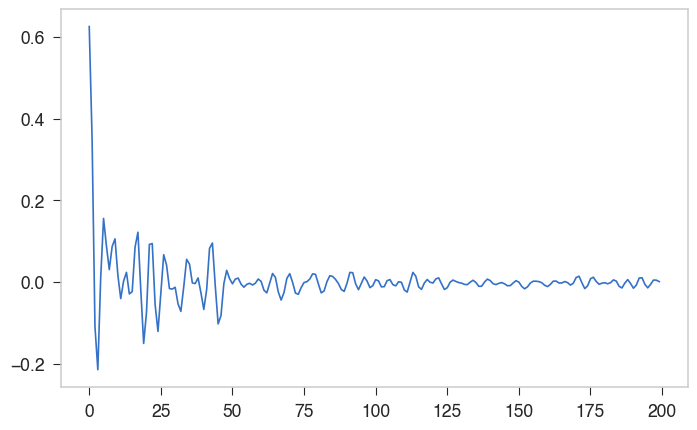

In [98]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss = compute_and_plot_ca(pre, d_length=200)

D:  283.9000124403377


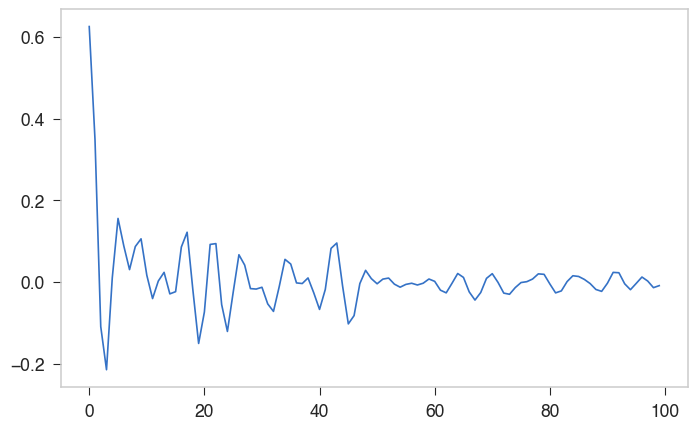

In [97]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss = compute_and_plot_ca(pre, d_length=100)

D:  2352.3922299538176


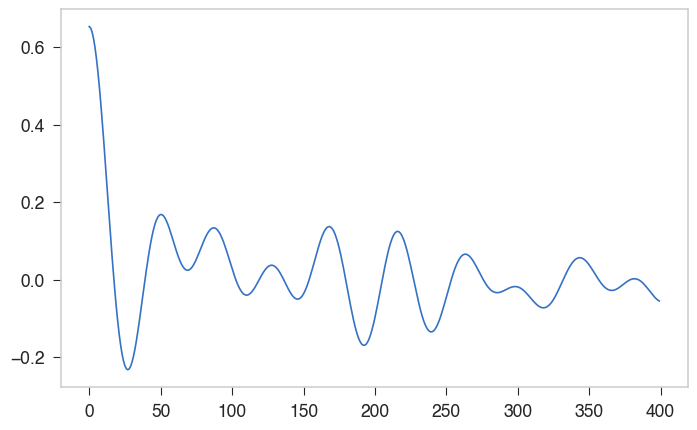

In [94]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss = compute_and_plot_ca(pre, d_length=400)

D:  4077.209180630172


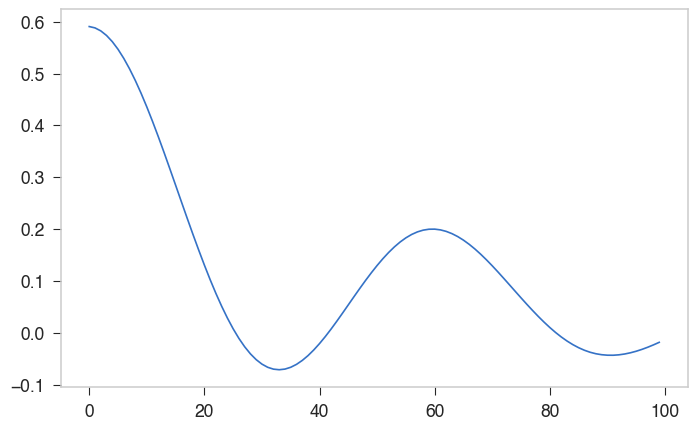

In [69]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss = compute_and_plot(pre, d_length=100)

D:  3497.156825628508


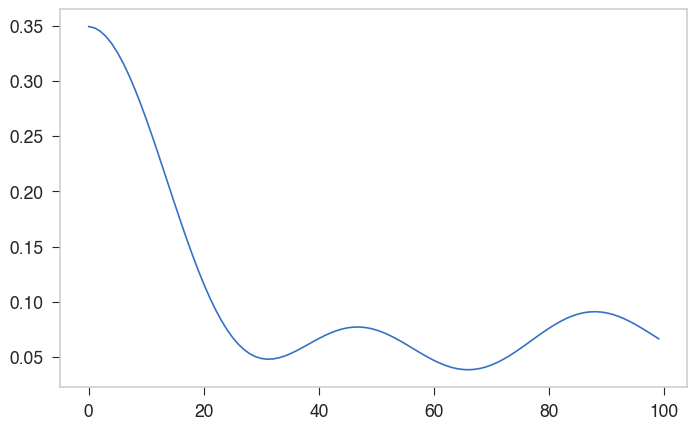

In [66]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss_all_atoms = compute_and_plot_all_atoms(pre, d_length=100)

D:  8075.288998078342


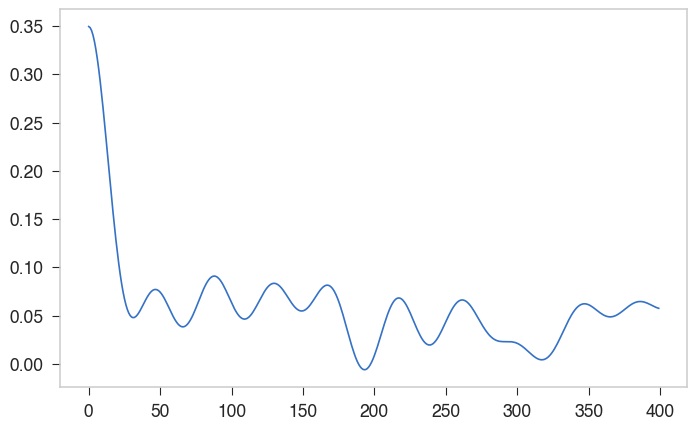

In [95]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss_all_atoms = compute_and_plot_all_atoms(pre, d_length=400)

D:  8075.288998078342


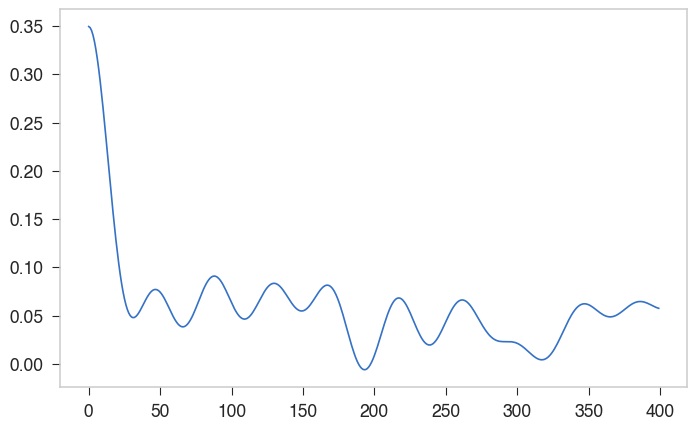

In [67]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run2/step1/0/"
ss_all_atoms = compute_and_plot_all_atoms(pre, d_length=400)

D:  4408776.7051166445


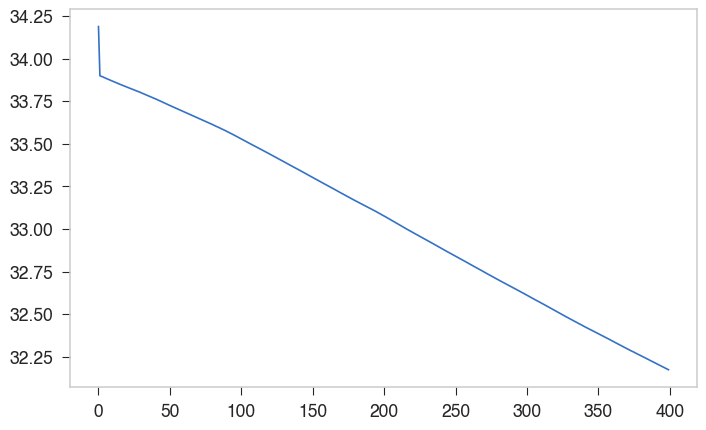

In [27]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/2_long/"
ss_all_atoms = compute_and_plot_all_atoms(pre)

D:  42006216.17530753


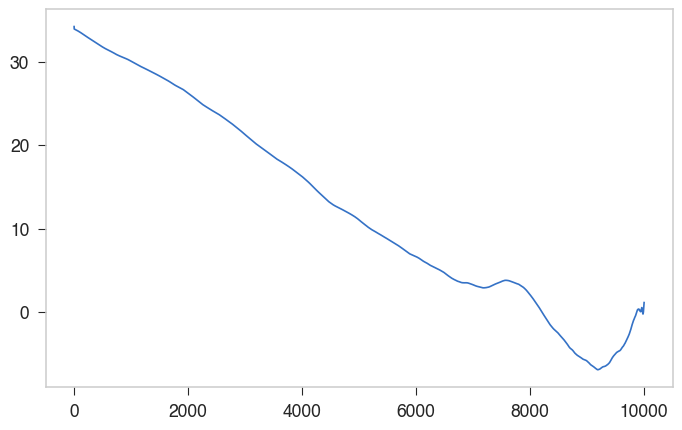

In [30]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/2_long/"
ss_all_atoms = compute_and_plot_all_atoms(pre, d_length=10000)

In [20]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/run1/step100/0/"
ss = compute_and_plot_all_atoms(pre)

ZeroDivisionError: division by zero

D:  259667.00964825015


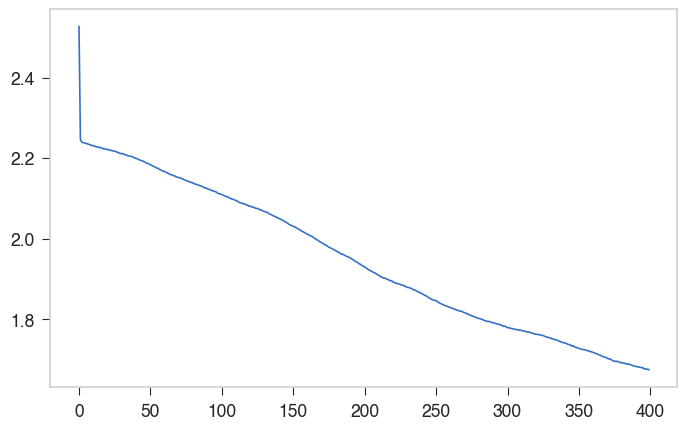

In [8]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/1/"
ss = compute_and_plot_all_atoms(pre)

D:  110761.1132988413


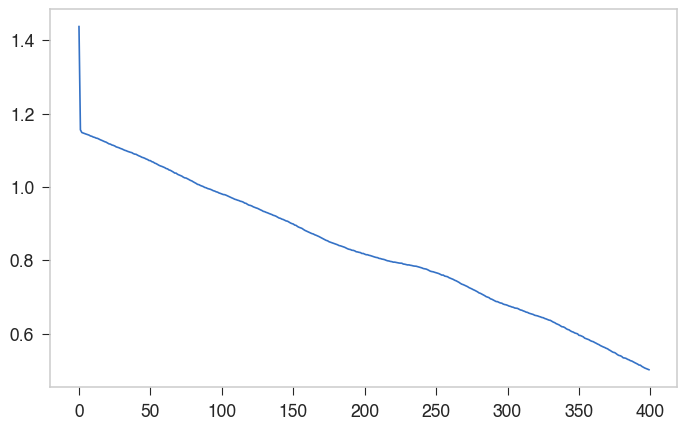

In [12]:
pre = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/0/"
ss = compute_and_plot_all_atoms(pre)

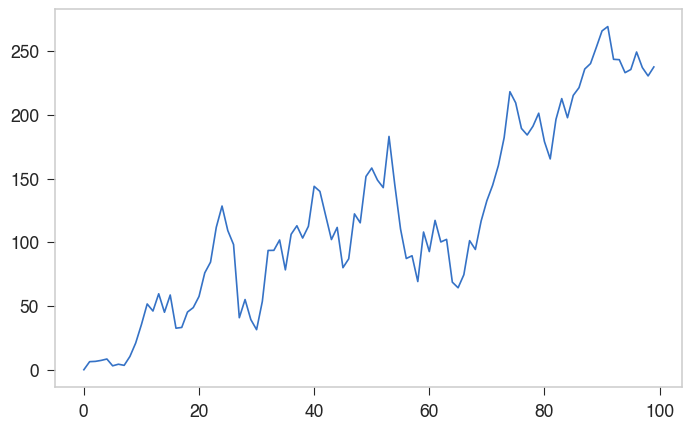

In [5]:
movieFile = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/step1000/0/movie.pdb"
parser = PDBParser()
s = parser.get_structure("X", movieFile)
# I want to have all the coordinates of all CA.
info = []
for i, model in enumerate(s.get_models()):
    for j, res in enumerate(model.get_residues()):
        ca_coord = res["CA"].get_coord()
        info.append([i, j] + list(ca_coord))
data = pd.DataFrame(info, columns=["model", "res", "x", "y", "z"])
rsquare_list = []
model_list = []
for model, d in data.groupby("model"):
    if model == 0:
        a_0 = d.iloc[:, 2:5].values
    a = d.iloc[:, 2:5].values - a_0
    rsquare = np.sum(a**2)/len(a)
    # print(rsquare, model)
    model_list.append(model)
    rsquare_list.append(rsquare)
plt.plot(model_list, rsquare_list)

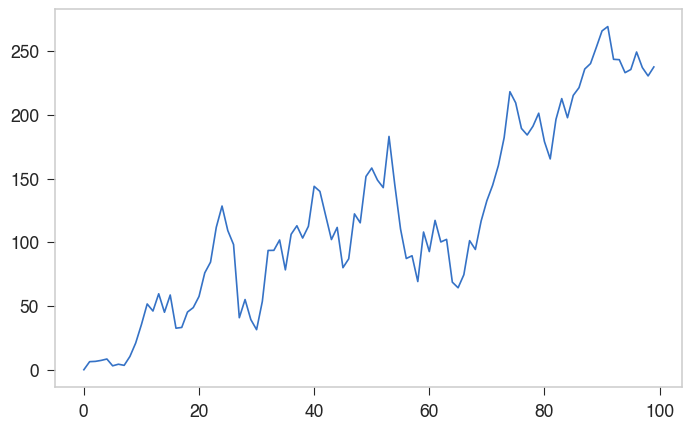

In [230]:
plt.plot(model_list, rsquare_list)

In [ ]:
with open(movieFile, "r") as f:
    a = f.readlines()
a = a[1:-1]
n = len(a)
length = int(n/10)

i = 0
b = a[i*length:(i+1)*length]

In [71]:
movieFile = "/Users/weilu/Research/server/dec_2019/diffusion_timescale/native/300/movie.pdb"
parser = PDBParser()
s = parser.get_structure("X", movieFile)

# I want to have all the coordinates of all CA.
info = []
for i, model in enumerate(s.get_models()):
    for j, res in enumerate(model.get_residues()):
        ca_coord = res["CA"].get_coord()
        info.append([i, j] + list(ca_coord))
data = pd.DataFrame(info, columns=["model", "res", "x", "y", "z"])
a = data.iloc[:, 2:5].values
rsqure = np.sum(a**2)/len(a)
for model, d in data.groupby("model"):
    a = d.iloc[:, 2:5].values
    rsqure = np.sum(a**2)/len(a)
    print(rsqure, model)

634.3550614315755 0
636.0127210223991 1
629.0899999008516 2
631.5779121426749 3
632.922798325731 4
635.2741800161668 5
634.1971441560834 6
630.8864986113338 7
635.1361545354933 8
632.0191251897879 9


In [73]:
a = res["CA"]

In [74]:
a.id

'CA'

In [75]:
a.full_id

('X', 9, 'A', ('H_NGP', 63, ' '), ('CA', ' '))

In [79]:
model = list(s.get_models())[0]

In [80]:
model.get_atoms()

<generator object Model.get_atoms at 0x1a29b62728>

In [85]:
ca_list = []
for i, atom in enumerate(model.get_atoms()):
    if atom.id == "CA":
        # print(i)
        ca_list.append(i)